# Churn Prediction

## Building churn model of costumer for EU Bank 

#### Over the recent years, the costumers churning is an important task for all businesses and the EU Bank is not an exception. Predicting customer behavior can help EU Bank to manage and understand they need and they will have an overview of predicting churn customers. EU Bank has already a labeled data set. Their marketing team wants to build machine learning pipeline and build a model for. In order to have an inside that which costumers will stay and which will not. The data set has attributes of their customers such as CreditScore, Geography, Gender Age, Tenure Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary and finally Exited which shows that accounter holder will stay or not. their data set is supervised and its a classification task.

## Loading Python Library 

####  Importing the pandas Library and using the short name of pd for working with the data set.                                                                                Using sklearn for Model Selection, Preprocessing, Exploration, Feature engineering, Training model, and Evaluation Metrics. also using lmblearn for oversampling but in this model, I decided to not use it as a result of accuracy.

In [2]:
import pandas as pd 

import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import sklearn.decomposition
import imblearn.over_sampling
import matplotlib.pyplot as plt
import sklearn.model_selection

import sklearn.tree
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm

## Loading Data Set:

#### Used pandas library for loading data set and then set the CustomerID as an index because each has their number and also surname and Rownumber columns were dropped since there were not useful for predicting. The axis was given one to drop columns and finally, the data set run.

In [3]:
df = pd.read_csv("../datasets/churn_modeling.csv")
df = df.set_index("CustomerId")
df = df.drop(['Surname','RowNumber'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("the columns is:",df.columns)

print("The shape of dataset is:",df.shape)

the columns is: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
The shape of dataset is: (10000, 11)


## Split data into train and test: 

#### Split the data into Train and Test sets before doing any feature engineering and training so test set will be untouched. The proportion of training set and test set were allocated to 85% and 15%                                                                                                                                                                                                           

In [5]:
df_train, df_test, = sklearn.model_selection.train_test_split(df, train_size=.85, test_size=.15)

print("df_train:", df_train.shape)

print("df_test:",df_test.shape)

df_train: (8500, 11)
df_test: (1500, 11)


## Data Exploration:

### Balance Exploration

In [6]:
df_train["Exited"].value_counts() 

0    6753
1    1747
Name: Exited, dtype: int64

####   The amount of the target label was measured to check the balance. As a result, it seems almost balanced.

### Exploration for missing values:

### Explicit missing values

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Understood all explicit missing values by isnull.sum method.  All columns are  zero so there are not any explicit missing values in this data set.

### Implicit missing values 

####  The unique methods check if there are any implicit missing values in the dataset. If there are very different values, there might be missing values. 

In [8]:
df['CreditScore'].unique()


array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [12]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [13]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [14]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [15]:
df['HasCrCard'].unique()

array([1, 0])

In [17]:
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

#### So it is clear there are not any implicit missing values.

## Data Preprocessing and Feature enginering:

### Spliting features and target lable 

#### Now is the time to split the feature and target label of the train set and test set. (the axis is equal to one to split by columns)

In [18]:
x_train = df_train.drop(["Exited"], axis=1)
y_train = df_train["Exited"]

print("y_train:", y_train.shape)
print("x_train:", x_train.shape)

x_test = df_test.drop(["Exited"], axis=1)
y_test = df_test["Exited"]

print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

y_train: (8500,)
x_train: (8500, 10)
x_test: (1500, 10)
y_test: (1500,)


### One_Hot_Encoding 

#### One-Hot-Encoding is necessary if there are non-numerical attributes in the data set. By this method, the non-numerical attributes are categorized. In this notebook, scikit-learn use to do One-Hot-Encoding.

In [19]:
one_hot_encoding = sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore')



one_hot_encoding.fit(x_train)
one_hot_encoding.fit(x_test)



x_train = one_hot_encoding.transform(x_train).toarray()

x_test = one_hot_encoding.transform(x_test).toarray()



print("x_train_encoded:", x_train.shape)
print("x_test_encoded:", x_test.shape)

x_train_encoded: (8500, 2947)
x_test_encoded: (1500, 2947)


In [20]:
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(x_train)


x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print("x_train_reduced:", x_train.shape)
print("x_test_reduced:", x_test.shape)

x_train_reduced: (8500, 100)
x_test_reduced: (1500, 100)


#### The number of components must be strictly less than the minimum of n_features and n_samples.so that is why I put 100 

#### Feature engineering steps were checked for this notebook. such as, standardization, oversampling, and dimensionality reduction. All tested, and the best accuracy is when only PCA dimensionality reduction applies.

## Model Selection and Hyperparameter Tuning

#### Decision tree, Logistic regression, KNN, SVM were chosen for the training model. Grid-search was applied for tuning hyperparameters. The result of Grid search would say which model is the best. based on the accuracy. cv and n_jobs are the Grid search parameters and were given values of 5 and -1.

### Decision tree classfier

In [21]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(3, 20,2), 
    "min_samples_split": range(10,100),
    "max_features" : ["auto", "sqrt", "log2"]
}
model_1 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), 
                                               parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
model_1.fit(x_train, y_train)
print("Accuracy of best decision tree classfier = {:.2f}".format(model_1.best_score_))
print("Best found hyperparameters of decision tree classfier = {}".format(model_1.best_params_))

Accuracy of best decision tree classfier = 0.84
Best found hyperparameters of decision tree classfier = {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 56}


#### The criterion, max_depth, min_samples_split, and max_features were which are the best parameters and the were tuned, and best hyper parameters and  accuracy were calculated.

### Logestic regression 

In [28]:
parameters_grid = {
    "fit_intercept" :[True,False],
    "C": [0.44,0.45,0.47,0.48,0.5,0.55,0.7],
     "tol" : [0,.0001,2.5]          
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LogisticRegression(),
                                             parameters_grid, scoring="accuracy", cv=5, n_jobs=1)
model_2.fit(x_train, y_train)
print("Accuracy of best Logistic regression = {:.2f}".format(model_2.best_score_))
print("Best found hyperparameters of Logistic regression = {}".format(model_2.best_params_))

Accuracy of best Logistic regression = 0.85
Best found hyperparameters of Logistic regression = {'C': 0.5, 'fit_intercept': True, 'tol': 2.5}


#### tried to improve the accuracy by tuning the C,fit_intercept an tol . Giving a variety of numbers to them to get the best result. The best accuracy from this model is achived 85%. 

### KNN

In [23]:
parameters_grid = {
    "n_neighbors": [1,4,5,6], 
   "metric": ["minkowski", "euclidean", "manhattan"],
    "leaf_size" : [20,25,30,35],
}
model_3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                               parameters_grid, scoring="accuracy", cv=5, n_jobs=1)
model_3.fit(x_train, y_train)
print("Accuracy of best KNN classfier = {:.2f}".format(model_3.best_score_))
print("Best found hyperparameters of KNN classifier = {}".format(model_3.best_params_))

Accuracy of best KNN classfier = 0.83
Best found hyperparameters of KNN classifier = {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 6}


#### KNN is one of the complicated models. n_neighbors, metric, leaf_size are the most vital hyperparameters, and tuning them to get the best accuracy. But it seems this model gives the lowest accuracy. It could be a result of the complexity that this model has.

### SVM

In [24]:
parameters_grid = {
    "kernel": ["linear", "rbf", "poly"], 
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
}
model_4 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), 
                                               parameters_grid, scoring="accuracy", cv=4, n_jobs=-1)
model_4.fit(x_train,y_train)
print("Accuracy of best SVM classfier = {:.2f}".format(model_4.best_score_))
print("Best found hyperparameters of SVM classifier = {}".format(model_4.best_params_))

Accuracy of best SVM classfier = 0.85
Best found hyperparameters of SVM classifier = {'C': 1, 'kernel': 'rbf'}


#### Trainied the SVM model as well to see could it find a better model for the data set. tried to find the best value for Kernel and C and as the result is same as logistic regression .

## Model assessment:

In [25]:
y_predicted = model_4.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)


print("Accuracy =", accuracy)

Accuracy = 0.8553333333333333


#### The Accuracy shows the percentage that the model predicted correctly  and in this has arround 85%accuracy.

Confusion Matrix:
 [[1173   37]
 [ 180  110]]


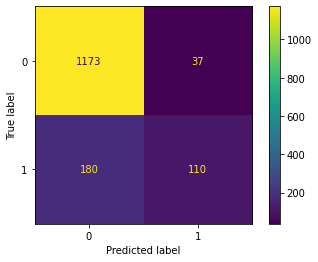

In [26]:
confusion= sklearn.metrics.confusion_matrix(y_test, y_predicted)

disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=model_4.classes_)

disp.plot()
print("Confusion Matrix:\n", confusion)

#### Confusion matrix is used to see how the model predict truely. as it shows in the plot there was 1155 people how predicted to exit correctly also there were 121 peole who predicted to stay and they stay however, 46 people predicted to stay but the exited. and fortunatelly this number is not a lot . Additionally the number of people how predicted to exit but they do not is 178 which oes not make many chanches in our planning for costumer churning.


In [27]:
precision, recall, f1,support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)


print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)

Precision : [0.86696231 0.74829932]
Recall : [0.96942149 0.37931034]
F1 Score : [0.91533359 0.50343249]


#### Precision is the metric that shows the ratio of the number of the class that predicted correctly to all the number of correct predictions. Recall is the metric for a ratio of all corrected predictions of the class to all numbers that are correctly predicted from other class and the other class that is not predicted correctly.F1 is a combination of precision and Recall. 

## Feature Importance Analysis:

##### as we can see there is not very different between the models that trained the accuray has only diffrent one or two perecentages and that also when I do feture enginiering  standardization did not increase the accuracy so as we can see the highest accuracy I can achive is 85% and if the EU bank need more accurate model one suggestion for them is that they should collect more accutate feacures 

## Final Discussion:

####  Customer churn is a classification task. For decreasing, consumer churn behavior is important to understand consumer attributes and target the consumers to control consumer churn behavior ( 2016 Saran Kumar A.). EU bank like other businesses wants to have an insight into their consumer churning behavior so their marketing team wants me to build a machine learning pipeline to predict whether the consumer will stay with EU bank or not. First I upload the data set and then did data preprocessing and feature engineering. I tried logistic regression, decision tree, KNN, and SVM then by grid search method I found the best model and hyperparameters. I choose the best model and calculate the accuracy, confusion metric other metrics such as precision, recall, and f1. The advantage of this data set is that the data was clear and clean. Also, the metrics I got are a good result but can still improve for the future and tune the model more accurately. 

## Resource 

#### International Journal of Computer Applications (0975 – 8887)Volume 154 – No.10, November 2016 13 A Survey on Customer Churn Prediction using Machine Learning TechniquesSaran Kumar A.M.E. ScholarKumaraguru College of Technology Coimbatore, India